<a href="https://colab.research.google.com/github/El-Nico/tensorflow-notes/blob/main/regression_excersises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🛠 Exercises
1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
  * Building a larger model (how does one with 4 dense layers go?).
  * Increasing the number of units in each layer.
  * Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
  * What happens if you train for longer (say 300 epochs instead of 200)? 
4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) and model it.


1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

In [55]:
#creating linear regression data with numpy
import numpy as np
import matplotlib.pyplot as plt

In [56]:
#create features
X=np.arange(1,6,0.5)
X

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5])

In [57]:
#create labels
Y=np.arange(10,60,5)
Y

array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55])

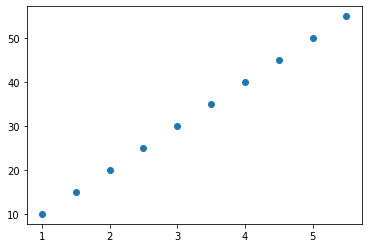

In [58]:
#visualize
plt.scatter(X, Y)

2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

In [59]:
#imports
import tensorflow as tf


In [60]:
#tensorize numpy array
X=tf.constant(X)
Y=tf.constant(Y)
X,Y

(<tf.Tensor: shape=(10,), dtype=float64, numpy=array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5])>,
 <tf.Tensor: shape=(10,), dtype=int64, numpy=array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55])>)

In [61]:
#using the keras sequential api to make predictions

#create model usin the sequential api
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, input_shape=[1]),
                             tf.keras.layers.Dense(1),
                              tf.keras.layers.Dense(1),
                              tf.keras.layers.Dense(1)
])

#compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 656ms/step - loss: 32.2755 - mae: 32.2755
Epoch 2/30
1/1 [==============================] - 0s 9ms/step - loss: 32.2364 - mae: 32.2364
Epoch 3/30
1/1 [==============================] - 0s 15ms/step - loss: 32.1958 - mae: 32.1958
Epoch 4/30
1/1 [==============================] - 0s 12ms/step - loss: 32.1536 - mae: 32.1536
Epoch 5/30
1/1 [==============================] - 0s 10ms/step - loss: 32.1094 - mae: 32.1094
Epoch 6/30
1/1 [==============================] - 0s 13ms/step - loss: 32.0630 - mae: 32.0630
Epoch 7/30
1/1 [==============================] - 0s 11ms/step - loss: 32.0140 - mae: 32.0140
Epoch 8/30
1/1 [==============================] - 0s 8ms/step - loss: 31.9622 - mae: 31.9622
Epoch 9/30
1/1 [==============================] - 0s 10ms/step - loss: 31.9072 - mae: 31.9072
Epoch 10/30
1/1 [==============================] - 0s 9ms/step - loss: 31.8484 - mae: 31.8484
Epoch 11/30
1/1 [==============================] - 0s 15ms/st

In [62]:
X

<tf.Tensor: shape=(10,), dtype=float64, numpy=array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5])>

In [63]:
lastval=X[-1].numpy()+0.5

In [64]:
stopval=lastval+(0.5*10)

In [65]:
#create test features and labels
X_test=tf.constant(np.arange(lastval, stopval, 0.5 ))
X_test

<tf.Tensor: shape=(10,), dtype=float64, numpy=array([ 6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5])>

In [66]:
Y

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55])>

In [67]:
Y_test=tf.cast(X_test*10, tf.int32)
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 60,  65,  70,  75,  80,  85,  90,  95, 100, 105], dtype=int32)>

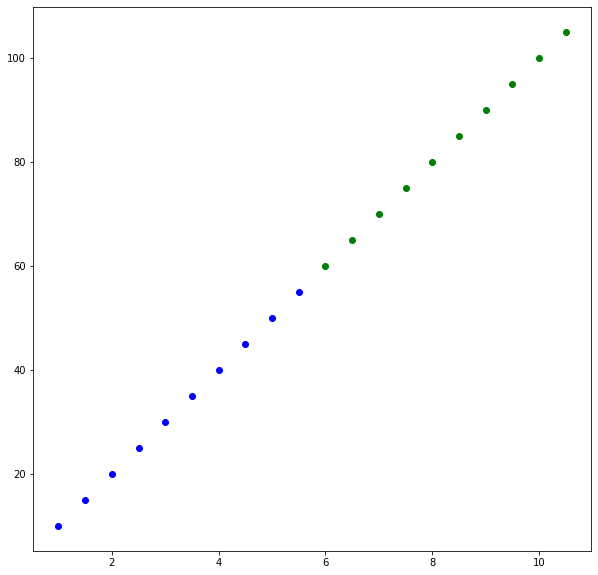

In [68]:
#visualize train and test data
plt.figure(figsize=(10,10))
#plot traing data in blue
plt.scatter(X, Y, c='b', label='Trainining data')
#plot test data in green
plt.scatter(X_test, Y_test, c='g', label="test data")

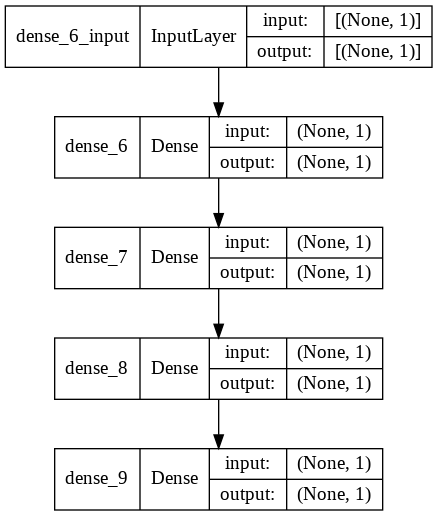

In [69]:
#visualizing model and predictions
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [70]:
#making predictions with the model
Y_preds= model.predict(X_test)

In [71]:
Y_preds

array([[10.731938 ],
       [11.5648155],
       [12.397691 ],
       [13.230568 ],
       [14.063444 ],
       [14.896318 ],
       [15.729197 ],
       [16.562069 ],
       [17.394949 ],
       [18.227821 ]], dtype=float32)

In [72]:
#building a plotting function
def plot_predictions(train_data=X,
                     train_labels=Y,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=Y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

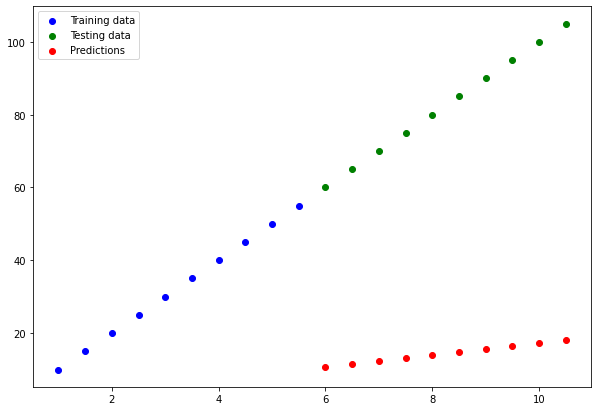

In [73]:
plot_predictions(train_data=X,
                     train_labels=Y,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=Y_preds)

3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
  * Building a larger model (how does one with 4 dense layers go?).
  * Increasing the number of units in each layer.
  * Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
  * What happens if you train for longer (say 300 epochs instead of 200)? 

In [74]:
#importing the insurance dataset
import pandas as pd

In [75]:
#read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [76]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [77]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [78]:
#data normalization and standardization using make_column_transformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [79]:
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

In [80]:
#creating features and labels
X=insurance.drop("charges", axis=1)
Y=insurance["charges"]

In [81]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [82]:
#fit column transformer on the training data
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [83]:
# Transform training and test data with normalization (MinMaxScalar)
X_train_normal= ct.transform(X_train)
X_test_normal= ct.transform(X_test)

In [84]:
#Non_normalized example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [85]:
#normalized example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [86]:
#viewing data shapes
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [87]:
len(X_train_normal)

1070

In [88]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [89]:
#ORIGINAL MODEL


# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, Y_train, epochs=200)


Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/200
34/34 [==============================] - 0s 6ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 11925.96

In [90]:
#evaluating the model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, Y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3171.5774 - mae: 3171.5774


In [91]:
#one of the main benefits of normalization is faster convergence time

 * Building a larger model with 4 dense layers.

In [92]:
insurance_model_4dense=tf.keras.Sequential([
        tf.keras.layers.Dense(1000),
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1), #output layer                                    
])

#compile the model
insurance_model_4dense.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

#fit the model for 200 epochs
insurance_model_4dense.fit(X_train_normal, Y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 9ms/step - loss: 13297.4092 - mae: 13297.4092
Epoch 2/200
34/34 [==============================] - 0s 7ms/step - loss: 12533.7021 - mae: 12533.7021
Epoch 3/200
34/34 [==============================] - 0s 7ms/step - loss: 9508.4912 - mae: 9508.4912
Epoch 4/200
34/34 [==============================] - 0s 6ms/step - loss: 7857.6260 - mae: 7857.6260
Epoch 5/200
34/34 [==============================] - 0s 8ms/step - loss: 7529.5029 - mae: 7529.5029
Epoch 6/200
34/34 [==============================] - 0s 7ms/step - loss: 7176.0156 - mae: 7176.0156
Epoch 7/200
34/34 [==============================] - 0s 5ms/step - loss: 6683.5479 - mae: 6683.5479
Epoch 8/200
34/34 [==============================] - 0s 7ms/step - loss: 5991.7471 - mae: 5991.7471
Epoch 9/200
34/34 [==============================] - 0s 6ms/step - loss: 5003.1641 - mae: 5003.1641
Epoch 10/200
34/34 [==============================] - 0s 7ms/step - loss: 4041.6340 - mae: 4041.

In [93]:
insurance_model_3_loss, insurance_model_3_mae

(3171.577392578125, 3171.577392578125)

In [94]:
#evaluate the 4 dense model
insurance_model_4dense_loss, insurance_model_4dense_mae= insurance_model_4dense.evaluate(X_test_normal, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3169.9792 - mae: 3169.9792


In [95]:
#result==> model performs slightly better

 * Increasing the number of units in each layer by 1 order of magnitude


In [96]:
#build the model (3 layers, 10000, 100, 1)
insurance_model_increased_units=tf.keras.Sequential([
      tf.keras.layers.Dense(10000),
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(1)                                               
])

#compile the model
insurance_model_increased_units.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)


#fit the model on the training data
insurance_model_increased_units.fit(X_train_normal, Y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 19ms/step - loss: 13032.2617 - mae: 13032.2617
Epoch 2/200
34/34 [==============================] - 1s 17ms/step - loss: 10138.6143 - mae: 10138.6143
Epoch 3/200
34/34 [==============================] - 1s 17ms/step - loss: 7799.5273 - mae: 7799.5273
Epoch 4/200
34/34 [==============================] - 1s 17ms/step - loss: 7326.6265 - mae: 7326.6265
Epoch 5/200
34/34 [==============================] - 1s 17ms/step - loss: 6676.0244 - mae: 6676.0244
Epoch 6/200
34/34 [==============================] - 1s 17ms/step - loss: 5733.3745 - mae: 5733.3745
Epoch 7/200
34/34 [==============================] - 1s 18ms/step - loss: 4493.2080 - mae: 4493.2080
Epoch 8/200
34/34 [==============================] - 1s 18ms/step - loss: 3756.2629 - mae: 3756.2629
Epoch 9/200
34/34 [==============================] - 1s 17ms/step - loss: 3656.5447 - mae: 3656.5447
Epoch 10/200
34/34 [==============================] - 1s 17ms/step - loss: 3650.0278 - 

In [97]:
insurance_model_3_loss, insurance_model_3_mae

(3171.577392578125, 3171.577392578125)

In [98]:
#evaluate the more neurons model
insurance_model_increased_units_loss, insurance_model_increased_units_mae= insurance_model_increased_units.evaluate(X_test_normal, Y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3162.0945 - mae: 3162.0945


In [99]:
#Result==>the increased units model experienced modestly more accuracy

 * increasing the adam learning rate by 10x

In [100]:
#replicate insurance model 3
insurance_model_adam10x= tf.keras.Sequential([
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1),
])

#compile model with adam 10 x optimizer
insurance_model_adam10x.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

#fit the model to the training data
insurance_model_adam10x.fit(X_train_normal, Y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13227.7793 - mae: 13227.7793
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 11417.3584 - mae: 11417.3584
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 8133.8516 - mae: 8133.8516
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 7599.9395 - mae: 7599.9395
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 7113.3540 - mae: 7113.3540
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 6517.0640 - mae: 6517.0640
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 5597.6270 - mae: 5597.6270
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 4449.3560 - mae: 4449.3560
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 3754.3723 - mae: 3754.3723
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 3679.6929 - mae: 3679.

In [101]:
insurance_model_3_loss, insurance_model_3_mae

(3171.577392578125, 3171.577392578125)

In [102]:
#evaluate the faster learning rate model against the test data
insurance_model_adam10x_loss, insurance_model_adam10x_mae= insurance_model_adam10x.evaluate(X_test_normal, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3160.8762 - mae: 3160.8762


In [103]:
#Result==> faster learning rate model performs slightly better

 * training the model for 300 epochs

In [104]:
#create the 300 epochs mode
insurance_model_300e=tf.keras.Sequential([
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1),
])

#compile the model
insurance_model_300e.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

#fit the model on the training data for 300 epochs
insurance_model_300e.fit(X_train_normal, Y_train, epochs=300)

Epoch 1/300
34/34 [==============================] - 0s 2ms/step - loss: 13344.3066 - mae: 13344.3066
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 13334.6504 - mae: 13334.6504
Epoch 3/300
34/34 [==============================] - 0s 3ms/step - loss: 13311.5762 - mae: 13311.5762
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 13263.4893 - mae: 13263.4893
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 13178.4941 - mae: 13178.4941
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 13045.5146 - mae: 13045.5146
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 12854.2246 - mae: 12854.2246
Epoch 8/300
34/34 [==============================] - 0s 3ms/step - loss: 12594.6211 - mae: 12594.6211
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - loss: 12256.8105 - mae: 12256.8105
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 11839.81

In [105]:
insurance_model_3_loss, insurance_model_3_mae

(3171.577392578125, 3171.577392578125)

In [106]:
#evaluate the 300 epochs model on the test data
insurance_model_300e_loss, insurance_model_300e_mae = insurance_model_300e.evaluate(X_test_normal, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3160.8147 - mae: 3160.8147


In [107]:
#Result==> performs about as well as other previous experiments

4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) and model it.


In [108]:
#returns the boston_housing dataset as a tuple of numpy arrays in the form
#Tuple of Numpy arrays: (x_train, y_train), (x_test, y_test). 
data=tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)


In [146]:
(x_train, y_train), (x_test, y_test)=data

In [110]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [111]:
"mean house price=> "+'$'+str(tf.reduce_mean(y_train).numpy()*1000), '$'+str(tf.reduce_mean(y_test).numpy()*1000)

('mean house price=> $22395.049504950493', '$23078.43137254902')

(array([ 15.,  48.,  72., 120.,  64.,  31.,  21.,   8.,   8.,  17.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

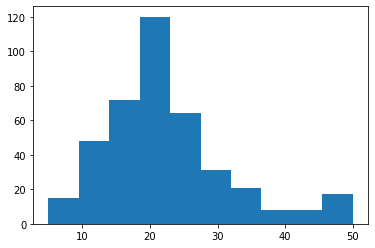

In [112]:
plt.hist(y_train)

In [113]:
#DESCRIPTION OF THE DATASET
# The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
#  prices and the demand for clean air', J. Environ. Economics & Management,
#  vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
#  ...', Wiley, 1980.   N.B. Various transformations are used in the table on
#  pages 244-261 of the latter.

#  Variables in order:
#  CRIM     per capita crime rate by town
#  ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#  INDUS    proportion of non-retail business acres per town
#  CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#  NOX      nitric oxides concentration (parts per 10 million)
#  RM       average number of rooms per dwelling
#  AGE      proportion of owner-occupied units built prior to 1940
#  DIS      weighted distances to five Boston employment centres
#  RAD      index of accessibility to radial highways
#  TAX      full-value property-tax rate per $10,000
#  PTRATIO  pupil-teacher ratio by town
#  B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#  LSTAT    % lower status of the population
#  MEDV     Median value of owner-occupied homes in $1000's

In [114]:
np.set_printoptions(suppress=True)
x_train[:5]
#data needs to be normalized

array([[  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
         91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
         18.72   ],
       [  0.02177,  82.5    ,   2.03   ,   0.     ,   0.415  ,   7.61   ,
         15.7    ,   6.27   ,   2.     , 348.     ,  14.7    , 395.38   ,
          3.11   ],
       [  4.89822,   0.     ,  18.1    ,   0.     ,   0.631  ,   4.97   ,
        100.     ,   1.3325 ,  24.     , 666.     ,  20.2    , 375.52   ,
          3.26   ],
       [  0.03961,   0.     ,   5.19   ,   0.     ,   0.515  ,   6.037  ,
         34.5    ,   5.9853 ,   5.     , 224.     ,  20.2    , 396.9    ,
          8.01   ],
       [  3.69311,   0.     ,  18.1    ,   0.     ,   0.713  ,   6.376  ,
         88.4    ,   2.5671 ,  24.     , 666.     ,  20.2    , 391.43   ,
         14.65   ]])

In [115]:
#normalizing the data only normalize x_train and x_test to prevent data leakage
x_train_normal=tf.keras.utils.normalize(
    x_train, axis=-1, order=2
)
x_test_normal=tf.keras.utils.normalize(
    x_test, axis=-1, order=2
)
x_train_normal[:5], x_test_normal[:5]

(array([[0.0024119 , 0.        , 0.01592969, 0.        , 0.00105285,
         0.01201967, 0.17945359, 0.00778265, 0.00782786, 0.6007879 ,
         0.04109624, 0.77671895, 0.03663436],
        [0.00004079, 0.15458728, 0.00380378, 0.        , 0.00077762,
         0.01425951, 0.02941843, 0.01174863, 0.00374757, 0.65207727,
         0.02754464, 0.74085721, 0.00582747],
        [0.00634506, 0.        , 0.02344637, 0.        , 0.00081738,
         0.00643804, 0.12953798, 0.00172609, 0.03108912, 0.86272295,
         0.02616667, 0.48644103, 0.00422294],
        [0.00008654, 0.        , 0.01133922, 0.        , 0.00112518,
         0.01318976, 0.0753763 , 0.01307681, 0.0109241 , 0.48939975,
         0.04413337, 0.86715519, 0.01750041],
        [0.00474344, 0.        , 0.02324766, 0.        , 0.00091578,
         0.00818934, 0.11354108, 0.00329719, 0.03082563, 0.85541129,
         0.02594491, 0.50275322, 0.01881648]]),
 array([[0.02675675, 0.        , 0.02677953, 0.        , 0.0010046 ,
         

In [121]:
#finally build a model to predict the data

housing_model_1=tf.keras.Sequential([
          tf.keras.layers.Dense(100),
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(1)
])

#compile the model
housing_model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

#fit the model for 100 epochs
housing_model_1.fit(x_train_normal, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 22.2162 - mae: 22.2162
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 21.1630 - mae: 21.1630
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 19.8815 - mae: 19.8815
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 18.1485 - mae: 18.1485
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 15.7219 - mae: 15.7219
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 12.4513 - mae: 12.4513
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 8.8432 - mae: 8.8432
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 6.4886 - mae: 6.4886
Epoch 9/100
13/13 [==============================] - 0s 6ms/step - loss: 6.2999 - mae: 6.2999
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 6.1689 - mae: 6.1689
Epoch 11/100
13/13 [===========================

In [122]:
#evaluating the models predictions by mae metrics
housing_model_1.evaluate(x_test_normal, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 5.4045 - mae: 5.4045


[5.404538154602051, 5.404538154602051]

In [159]:
#predictions are accurate to within 5,400 dollars
5.4045*1000

5404.5

In [164]:
tf.math.reduce_std(y_test).numpy()*1000, tf.reduce_min(y_test).numpy()*1000, tf.reduce_max(y_test).numpy()*1000

(9123.806690181465, 5600.0, 50000.0)